#  Counter Strike esea Tournament (south pacific) map, rounds and utility based Analysis

Counter Strike: Global Offensive is a team-based strategic shooter where one team, the terrorists, tries to plant a bomb and defend it until it detonates while the other team, the counter terrorists, attempt to stop the bomb plant or defuse it once it's planted. Now their are different maps each map has its own pros and cons to be played, some maps are more t-side dominant and others are ct-side dominant.

In this analysis I tried to analyze how selecting a map or picking a side (t or ct) impact in the result of the game. As Counter strike has been around from more 20 yrs in the e-sports, I took the data from the *ESEA* tournament. After playing this game for more than 10 yrs, being a part of some tournaments held by Nodwin in delhi one thing that has always drawn me to this game is the importance of *utility* — smoke grenades, flashbangs, and hand grenades. A well-thrown smoke can give your team cover to advance into a new position or block eyesight from an enemy and can have a pivotal role on the round.

This dataset contains all types of utility thrown during thousands of competitive games (containing millions of grenades) as well as other datapoints such as if/when the bomb was planted, and who won. Naturally, I had questions about how utility actually impacts gameplay.

# *Dataset Overview*

* **esea_master_grenades_demos.part1.csv, esea_master_grenades_demos.part2.csv**
  * 2990060 rows, 2256398 rows
  * 'file', 'round', 'seconds', 'att_team', 'vic_team', 'att_id', 'vic_id',
       'att_side', 'vic_side', 'hp_dmg', 'arm_dmg', 'hitbox', 'nade', 'att_rank', 'vic_rank', 'att_pos_x',
       'att_pos_y', 'nade_land_x', 'nade_land_y', 'vic_pos_x', 'vic_pos_y'
  * 'att_team', 'vic_team': the team throwing and getting hit by the grenade, respectively
  * 'is_bomb_planted', 'bomb_site': Whether the bomb has been planted, and if so, at which site
       
* **esea_meta_demos.part1.csv, esea_meta_demos.part2.csv**
  * 215919 rows, 161710 rows
  * ['file', 'map', 'round', 'start_seconds', 'end_seconds', 'winner_team',
       'winner_side', 'round_type', 'ct_eq_val', 't_eq_val']
* **esea_master_kills_demos.part1.csv, esea_master_kills_demos.part2.csv**
  * 1569477 rows, 1173169 rows
  * ['file', 'round', 'tick', 'seconds', 'att_team', 'vic_team', 'att_side',
       'vic_side', 'wp', 'wp_type', 'ct_alive', 't_alive', 'is_bomb_planted']
* **esea_master_dmg_demos.part1.csv, esea_master_dmg_demos.part2.csv**
  * 5992097 rows, 4546085 rows
  * ['file', 'map', 'round', 'start_seconds', 'end_seconds', 'winner_team',
       'winner_side', 'round_type']
  * 'ct_eq_val', 't_eq_val': Team equipment value
* **mm_grenades_demos.csv**
  * 366098 rows
  * ['Unnamed: 0', 'file', 'map', 'round', 'start_seconds', 'seconds',
       'end_seconds', 'att_team', 'vic_team', 'att_id', 'vic_id', 'att_side',
       'vic_side', 'hp_dmg', 'arm_dmg', 'is_bomb_planted', 'bomb_site',
       'hitbox', 'nade', 'winner_team', 'winner_side', 'att_rank', 'vic_rank',
       'att_pos_x', 'att_pos_y', 'nade_land_x', 'nade_land_y', 'vic_pos_x',
       'vic_pos_y', 'round_type', 'ct_eq_val', 't_eq_val', 'avg_match_rank']
* **mm_master_demos.csv**
  * 955466 rows
  * ['Unnamed: 0', 'file', 'map', 'date', 'round', 'tick', 'seconds',
       'att_team', 'vic_team', 'att_side', 'vic_side', 'hp_dmg', 'arm_dmg',
       'is_bomb_planted', 'bomb_site', 'hitbox', 'wp', 'wp_type', 'award',
       'winner_team', 'winner_side', 'att_id', 'att_rank', 'vic_id',
       'vic_rank', 'att_pos_x', 'att_pos_y', 'vic_pos_x', 'vic_pos_y',
       'round_type', 'ct_eq_val', 't_eq_val', 'avg_match_rank']
* **map_data.csv**
  * ['Unnamed: 0', 'EndX', 'EndY', 'ResX', 'ResY', 'StartX', 'StartY']

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
metaData1 = pd.read_csv(r"C:\Users\yoges\Downloads\archive (4)\esea_meta_demos.part1.csv")
metaData2 = pd.read_csv(r"C:\Users\yoges\Downloads\archive (4)\esea_meta_demos.part2.csv")
metaData = pd.concat([metaData1, metaData2]) # combine the data which was seperate

In [13]:
metaData.head() # so you can see what the data looks like
# ignore the winner_team as the majority of the rounds it is simply Team 1 or Team 2

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550


In [14]:
metaData.shape

(377629, 10)

In [15]:
metaData.columns

Index(['file', 'map', 'round', 'start_seconds', 'end_seconds', 'winner_team',
       'winner_side', 'round_type', 'ct_eq_val', 't_eq_val'],
      dtype='object')

In [16]:
metaData1.columns

Index(['file', 'map', 'round', 'start_seconds', 'end_seconds', 'winner_team',
       'winner_side', 'round_type', 'ct_eq_val', 't_eq_val'],
      dtype='object')

In [17]:
metaData2

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13818366.dem,de_cache,1,131.2287,203.7964,Team 1,CounterTerrorist,PISTOL_ROUND,2950,4300
1,esea_match_13818366.dem,de_cache,2,203.7964,268.6834,Team 1,CounterTerrorist,ECO,18400,4600
2,esea_match_13818366.dem,de_cache,3,268.6834,364.6373,Team 1,CounterTerrorist,ECO,25000,1500
3,esea_match_13818366.dem,de_cache,4,364.6373,460.1375,Team 1,CounterTerrorist,NORMAL,27550,23100
4,esea_match_13818366.dem,de_cache,5,460.1375,558.8445,Team 2,Terrorist,ECO,29450,11050
...,...,...,...,...,...,...,...,...,...,...
161705,esea_match_13829173.dem,de_mirage,18,1647.2060,1694.6550,Team 1,Terrorist,ECO,4500,21950
161706,esea_match_13829173.dem,de_mirage,19,1694.6550,1753.4380,Team 1,Terrorist,NORMAL,16400,26100
161707,esea_match_13829173.dem,de_mirage,20,1753.4380,1803.6580,Team 1,Terrorist,FORCE_BUY,15100,26000
161708,esea_match_13829173.dem,de_mirage,21,1803.6580,1856.0850,Team 1,Terrorist,NORMAL,17550,25500


In [18]:
metaData

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550
...,...,...,...,...,...,...,...,...,...,...
161705,esea_match_13829173.dem,de_mirage,18,1647.20600,1694.6550,Team 1,Terrorist,ECO,4500,21950
161706,esea_match_13829173.dem,de_mirage,19,1694.65500,1753.4380,Team 1,Terrorist,NORMAL,16400,26100
161707,esea_match_13829173.dem,de_mirage,20,1753.43800,1803.6580,Team 1,Terrorist,FORCE_BUY,15100,26000
161708,esea_match_13829173.dem,de_mirage,21,1803.65800,1856.0850,Team 1,Terrorist,NORMAL,17550,25500


## Game Time

### Map Prevalence

In [25]:
# picks out the relavent data and groups them by game and map
mapPrevalence = metaData.groupby(['file','map']).count().reset_index()[['file','map']]
# renames the column and counts the number of times a map is seen
mapPrevalence = mapPrevalence['map'].value_counts().reset_index().rename(columns = {'index':'Map', 'map':'Times Played'})

mapPrevalence

,Times Played,count
0,de_mirage,5279
1,de_cache,5018
2,de_inferno,2080
3,de_overpass,940
4,de_dust2,804
5,de_train,503
6,de_cbble,234
7,de_nuke,63


<Axes: xlabel='count', ylabel='Times Played'>

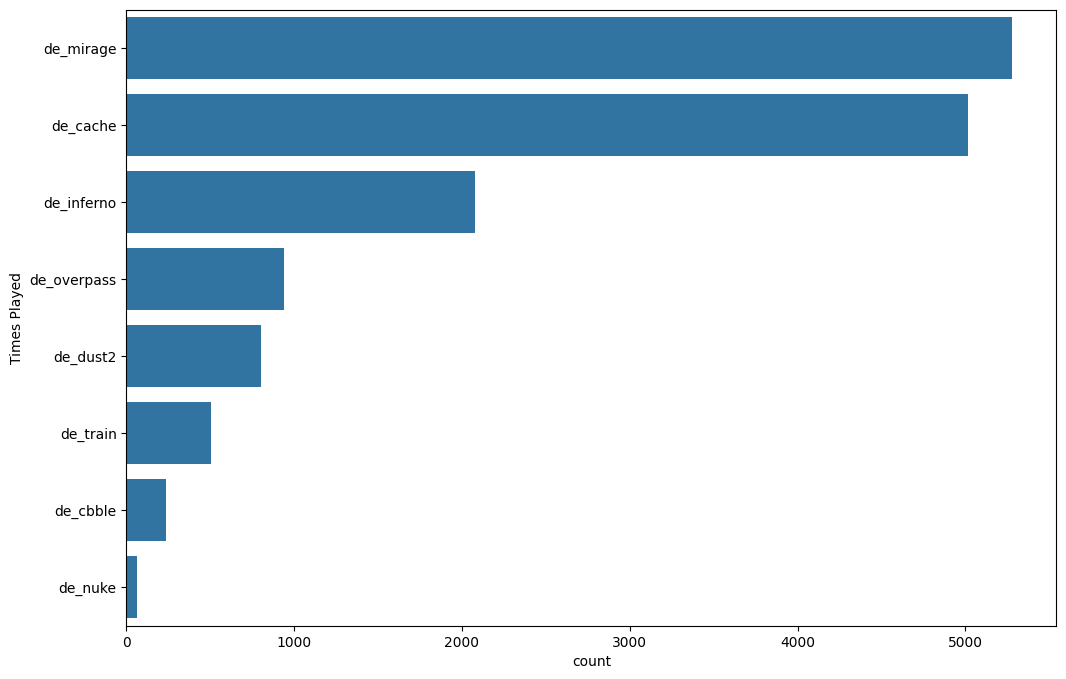

In [27]:
# plots the data
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(x='count',y='Times Played', data = mapPrevalence)

It can be seen that Mirage and Cache are by far the most picked maps, and Nuke by far the least. A possible reason for this will be shown later when looking at map balance.

In [28]:
mapPrevalence

,Times Played,count
0,de_mirage,5279
1,de_cache,5018
2,de_inferno,2080
3,de_overpass,940
4,de_dust2,804
5,de_train,503
6,de_cbble,234
7,de_nuke,63


### Game Durations

Finding the number of rounds in each game

In [29]:
# finding the number of rounds in each game and renaming the columns
gameRounds = metaData[['file','round']].groupby('file').max().rename(columns = {'round':'Number of Rounds'}).reset_index()

In [30]:
# some of the data for the games do not begin at round 1 as can be seen below
metaData[['file','round']].groupby('file').min()['round'].value_counts()

round
1    13198
2     1716
3        7
Name: count, dtype: int64

In [31]:
# it was going to be a little tedious to filter the start time of each round because of the above. So I just found an average
# start time and used that. The average game times are 2268 second which is small compared to the std of the start times.
startTime = metaData[['file','start_seconds']].groupby('file').min().mean()
startTimeStd = metaData[['file','start_seconds']].groupby('file').min().std()
print(startTime)
print(startTimeStd)

start_seconds    138.360112
dtype: float64
start_seconds    31.812854
dtype: float64


In [32]:
# finding the total game time
gameTime = metaData[['file','end_seconds']].groupby('file').max()
# renaming the columns and subtracting the average start time
gameTime = gameTime.rename(columns = {'end_seconds':'Game Time /min'})-startTime.iloc[0]
print(gameTime.mean())
# convert from seconds to minutes
gameTime /= 60

Game Time /min    2268.417493
dtype: float64


<Axes: xlabel='Game Time /min'>

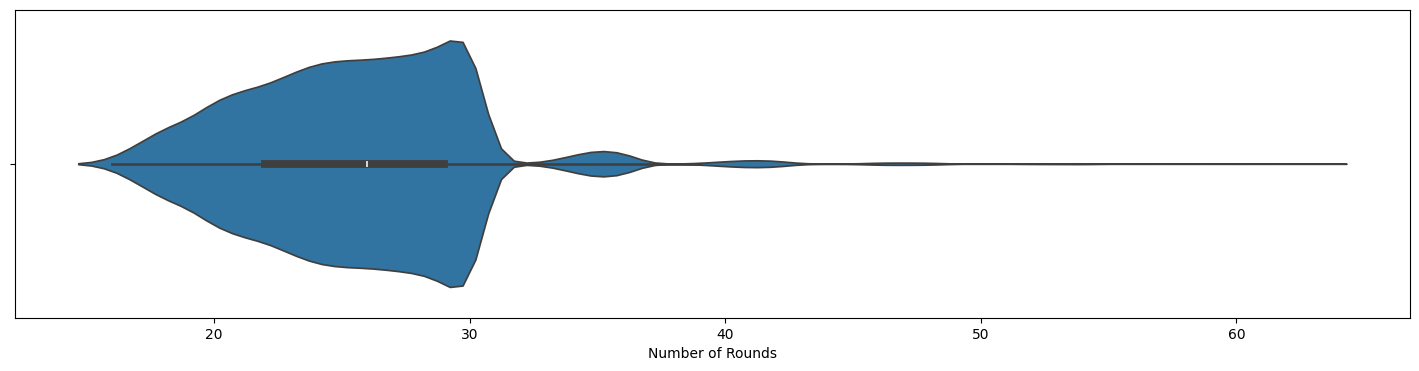

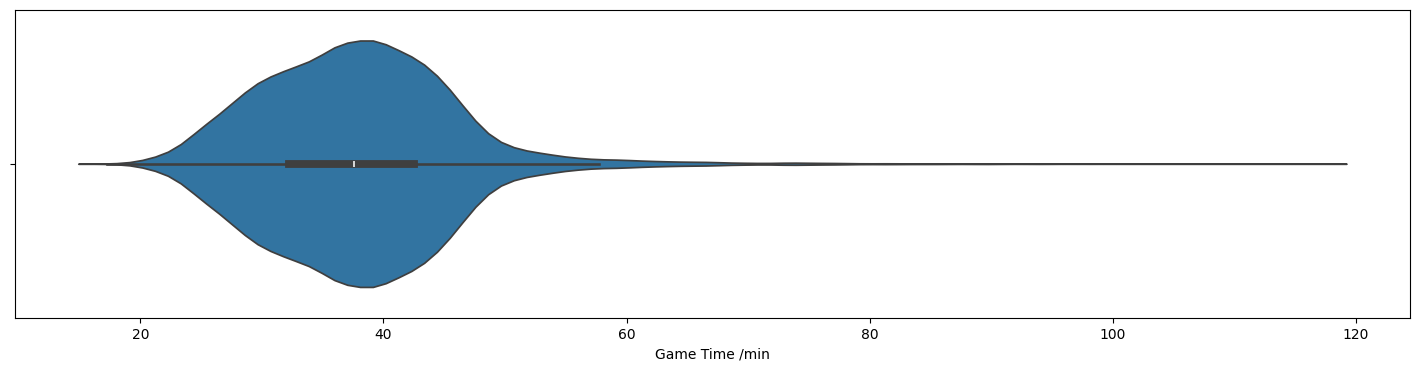

In [33]:
# plot the results for the number of rounds and minutes per game

fig, ax = plt.subplots(figsize=(18,4))
sns.violinplot(x = 'Number of Rounds', data = gameRounds, ax = ax)

fig2, ax2 = plt.subplots(figsize=(18,4))
sns.violinplot(x = 'Game Time /min', data = gameTime, ax = ax2)

The top graph shows that games generally have between 20 and 30 rounds which indicates generally balanced matchups. The numbers cuts off abruptly at 30 as that is the maximum number of rounds without overtime. Three further bulges can be seen afterwards (at around 35, 42, and 47) showing the data for further overtimes (which are progressively less common).

The bottom graph shows that games generally last between 30 and 45 minutes.

### Map Round Durations

In [34]:
# create a column with the round duration
metaData['Round Duration /s'] = metaData['end_seconds']-metaData['start_seconds']
# remove rounds that lasted more than 180 seconds as they must be erroneous
duration = metaData[metaData['Round Duration /s'] < 180]
#calculate the mean and std of the duration and present the data
durationMean = duration[['map','Round Duration /s']].groupby('map').mean()
durationStd = duration[['map','Round Duration /s']].groupby('map').std().rename(columns = {'Round Duration /s':'Sigma /s'})
pd.concat([durationMean, durationStd], axis = 1)

,Round Duration /s,Sigma /s
map,,
de_cache,86.100790,24.282304
de_cbble,86.031598,23.993863
de_dust2,83.452903,24.185220
de_inferno,91.436542,25.605594
de_mirage,84.807388,25.043647
de_nuke,83.238729,26.086363
de_overpass,90.802485,25.445677
de_train,82.106317,24.009712


In [41]:
duration

,file,map,round,start_seconds,end_seconds,winner_team,winner_side,round_type,ct_eq_val,t_eq_val,Round Duration /s
0,esea_match_13770997.dem,de_overpass,1,94.30782,160.9591,Hentai Hooligans,Terrorist,PISTOL_ROUND,4300,4250,66.65128
1,esea_match_13770997.dem,de_overpass,2,160.95910,279.3998,Hentai Hooligans,Terrorist,ECO,6300,19400,118.44070
2,esea_match_13770997.dem,de_overpass,3,279.39980,341.0084,Hentai Hooligans,Terrorist,SEMI_ECO,7650,19250,61.60860
3,esea_match_13770997.dem,de_overpass,4,341.00840,435.4259,Hentai Hooligans,Terrorist,NORMAL,24900,23400,94.41750
4,esea_match_13770997.dem,de_overpass,5,435.42590,484.2398,Animal Style,CounterTerrorist,ECO,5400,20550,48.81390
...,...,...,...,...,...,...,...,...,...,...,...
161705,esea_match_13829173.dem,de_mirage,18,1647.20600,1694.6550,Team 1,Terrorist,ECO,4500,21950,47.44900
161706,esea_match_13829173.dem,de_mirage,19,1694.65500,1753.4380,Team 1,Terrorist,NORMAL,16400,26100,58.78300
161707,esea_match_13829173.dem,de_mirage,20,1753.43800,1803.6580,Team 1,Terrorist,FORCE_BUY,15100,26000,50.22000
161708,esea_match_13829173.dem,de_mirage,21,1803.65800,1856.0850,Team 1,Terrorist,NORMAL,17550,25500,52.42700


<Axes: xlabel='Round Duration /s', ylabel='map'>

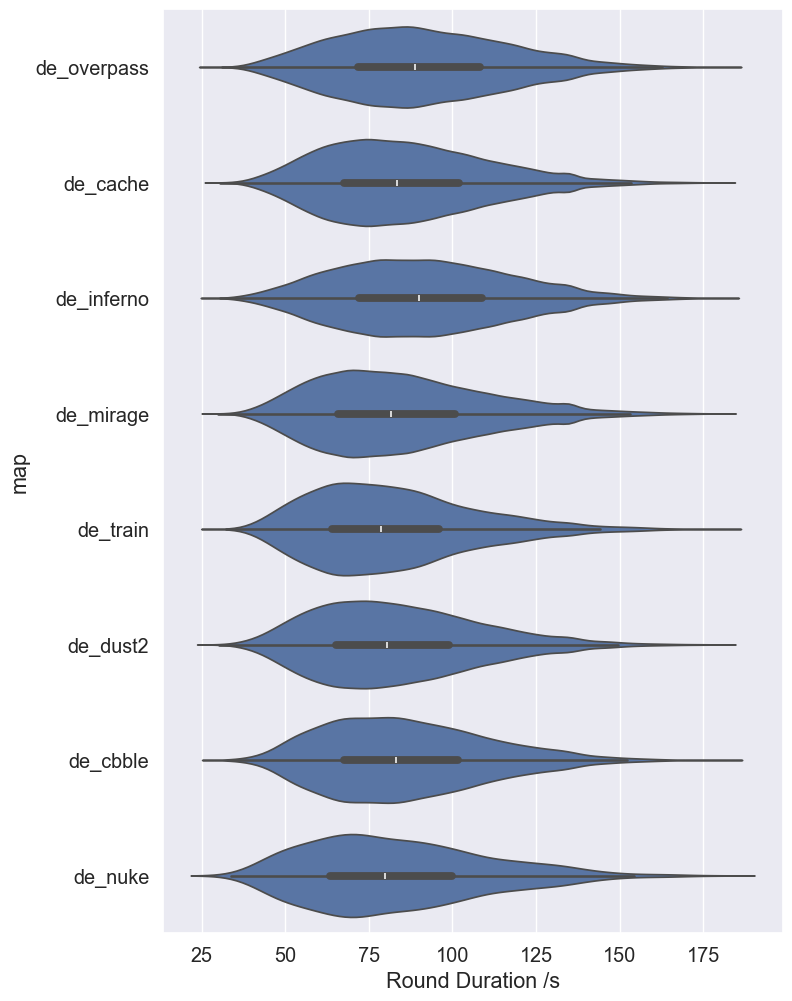

In [47]:
# plotting the data
fig, ax1 = plt.subplots(figsize = (8, 12))
sns.set(font_scale = 1.3)
sns.violinplot(y = 'map', x = 'Round Duration /s', data = duration)

The data shows that on average, rounds in CSGO all last about the same amount of time, regardless of map. In general they last between 80 and 90 seconds. I was expecting more unbalanced maps to have shorter rounds as the side towards which the map is unbalanced may win more quickly. The statistics do not support this theory, however.

In [58]:
print("Duplicate count:", metaData['round_type'].duplicated().sum())
print("Value counts:\n", metaData['round_type'].value_counts())

# extracting the relavent columns and renaming them
metaDataFormatted = duration[['round_type','Round Duration /s']].rename(columns = {'round_type':'Round Type'})

# renaming the round types so they are more presentable
metaDataFormatted['Round Type'] = metaDataFormatted['Round Type'].map({'PISTOL_ROUND':'Pistol Round','ECO':'Eco','SEMI_ECO':'Semi-eco',
                                                         'NORMAL':'Normal','FORCE_BUY':'Force Buy'})

#calculate the mean and std of the duration and present the data
durationMean = metaDataFormatted[['Round Type','Round Duration /s']].groupby('Round Type').mean()
durationStd = metaDataFormatted[['Round Type','Round Duration /s']].groupby('Round Type').std().rename(columns = {'Round Duration /s':'Sigma /s'})
pd.concat([durationMean, durationStd], axis = 1)

Duplicate count: 377624
Value counts:
 round_type
NORMAL          155582
ECO             128613
FORCE_BUY        40876
PISTOL_ROUND     28114
SEMI_ECO         24444
Name: count, dtype: int64


,Round Duration /s,Sigma /s
Round Type,,
Eco,79.917819,24.303581
Force Buy,87.453890,24.516028
Normal,93.575737,24.440773
Pistol Round,76.516536,19.724463
Semi-eco,84.699824,24.098440


C:\Users\yoges\AppData\Local\Temp\ipykernel_13352\211635174.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='Round Type', x='Round Duration /s', data=metaDataFormatted, palette=palette)


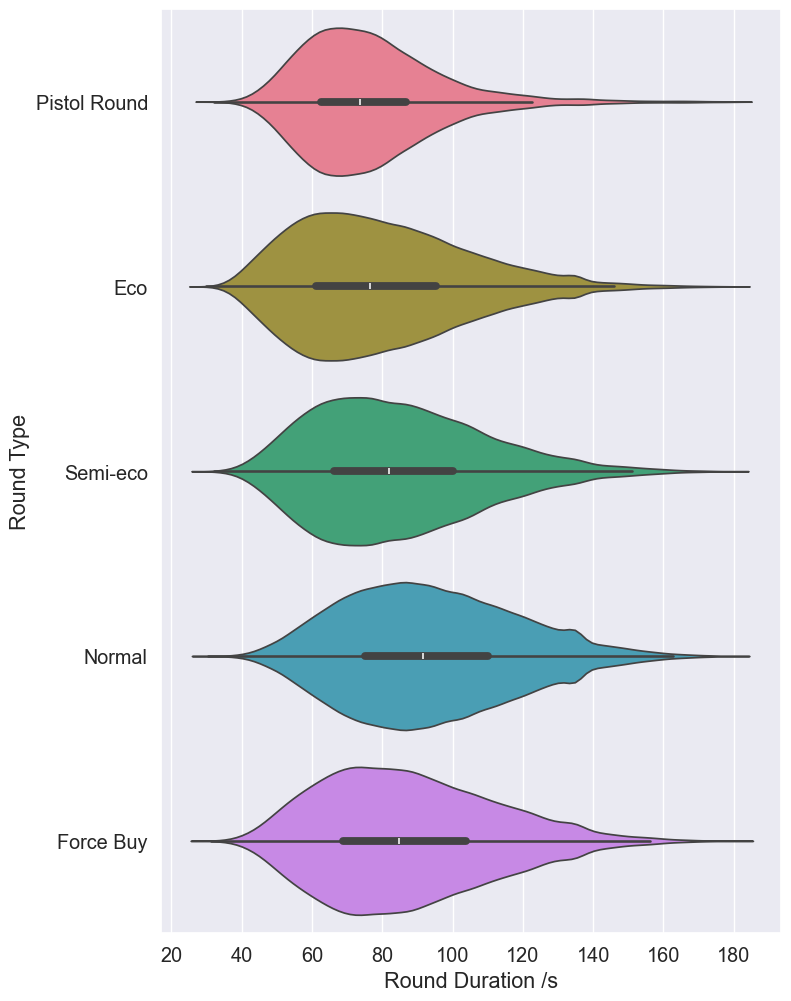

In [60]:
fig, ax1 = plt.subplots(figsize=(8, 12))
sns.set(font_scale=1.3)

# Set a color palette
palette = sns.color_palette("husl", n_colors=len(metaDataFormatted['Round Type'].unique()))

# Create the violin plot with the specified palette
sns.violinplot(y='Round Type', x='Round Duration /s', data=metaDataFormatted, palette=palette)

# Show the plot
plt.show()

The different types of rounds are very similar, however, "normal" rounds are generally a little bit longer. Pistol rounds (first rounds) are often slightly shorter which much less spread in the durations. I speculate that this is due to teams quickly rushinf in to finish the pistol round, knowing their own standard strategy, as well has knowing pretty much what the enemy has.

## Sidedness of the Maps

In [62]:
# Define an empty list to hold the data about who won the rounds
data_to_add = []

# Extract a DataFrame with the relevant information
winner = metaData[['map', 'winner_side']]

for mapName in metaData['map'].unique():  # Loop through the different maps that are played
    # Calculate the number of times Ts and CTs won per map type
    tWins = winner[(winner['map'] == mapName) & (winner['winner_side'] == 'Terrorist')].shape[0]
    ctWins = winner[(winner['map'] == mapName) & (winner['winner_side'] == 'CounterTerrorist')].shape[0]
    
    # Calculate total wins
    total = tWins + ctWins
    
    # Avoid division by zero
    if total > 0:
        ct_percentage = ctWins / total * 100
        t_percentage = tWins / total * 100
        sidedness_ct = (ctWins - tWins) / total * 100
        sidedness_t = (tWins - ctWins) / total * 100
    else:
        ct_percentage = t_percentage = sidedness_ct = sidedness_t = 0

    # Append the data to the list
    data_to_add.append({'Map': mapName, 'Wins': ctWins, 'Winning Side': 'CT', 
                        'Winning Percentage': ct_percentage, 'Sidedness': sidedness_ct})
    data_to_add.append({'Map': mapName, 'Wins': tWins, 'Winning Side': 'T', 
                        'Winning Percentage': t_percentage, 'Sidedness': sidedness_t})

# Create a DataFrame from the list
wins = pd.DataFrame(data_to_add)

# Display the results
wins

,Map,Wins,Winning Side,Winning Percentage,Sidedness
0,de_overpass,12136,CT,51.213234,2.426467
1,de_overpass,11561,T,48.786766,-2.426467
2,de_cache,60817,CT,47.504374,-4.991252
3,de_cache,67207,T,52.495626,4.991252
4,de_inferno,25034,CT,47.344731,-5.310538
5,de_inferno,27842,T,52.655269,5.310538
6,de_mirage,66373,CT,49.956722,-0.086557
7,de_mirage,66488,T,50.043278,0.086557
8,de_train,6711,CT,53.245002,6.490003
9,de_train,5893,T,46.754998,-6.490003


Plot the results

C:\Users\yoges\AppData\Local\Temp\ipykernel_13352\3117106785.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Map', y = 'T-Sidedness', palette = ['sandybrown'], data = filteredWins, ax = ax2)
C:\Users\yoges\AppData\Local\Temp\ipykernel_13352\3117106785.py:10: UserWarning: 
The palette list has fewer values (1) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Map', y = 'T-Sidedness', palette = ['sandybrown'], data = filteredWins, ax = ax2)


<Axes: xlabel='Map', ylabel='T-Sidedness'>

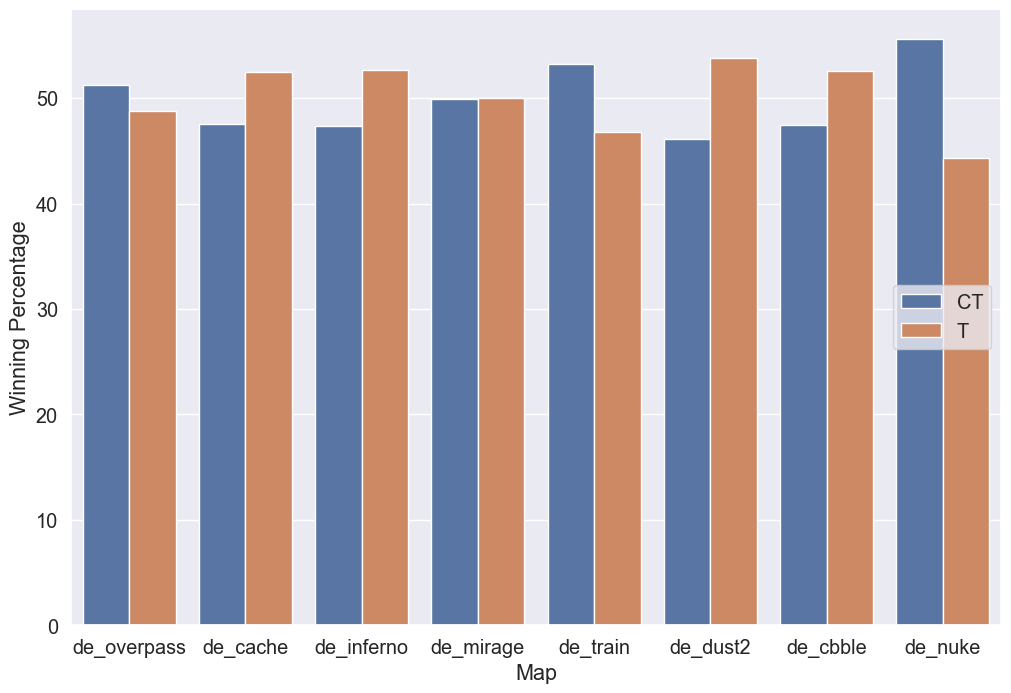

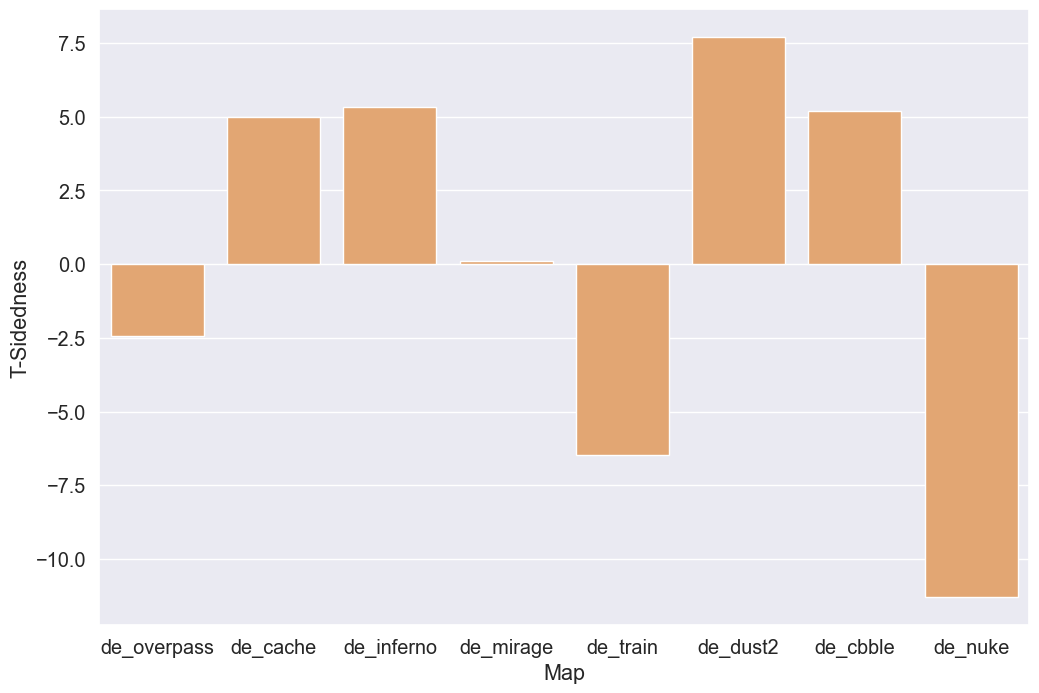

In [63]:
# plot the data from above

fig1, ax1 = plt.subplots(figsize=(12,8))
sns.set(font_scale = 1.3)
sns.barplot(x='Map',y='Winning Percentage',hue='Winning Side',data=wins, ax= ax1)
ax1.legend(loc = 7)

fig2, ax2 = plt.subplots(figsize=(12,8))
filteredWins = wins[wins['Winning Side'] == 'T'][['Map','Sidedness']].rename(columns={'Sidedness':'T-Sidedness'})
sns.barplot(x='Map', y = 'T-Sidedness', palette = ['sandybrown'], data = filteredWins, ax = ax2)

The data shows the number of matches won by Ts and CTs respectively. The data shows that the only truly balanced map is Mirage. The most unbalanced is Nuke (which is heavily CT-sded). It should be noted that Nuke was also the least played map and thus the statistic is based on much less data (Nuke was played just 63 times compared to Mirage's 5300).

## Kills Analysis

In [64]:
killsData1 = pd.read_csv(r"C:\Users\yoges\Downloads\archive (4)\esea_master_kills_demos.part1.csv")
killsData2 = pd.read_csv(r"C:\Users\yoges\Downloads\archive (4)\esea_master_kills_demos.part2.csv")
killsData = pd.concat([killsData1, killsData2])

In [65]:
killsData.head()

,file,round,tick,seconds,att_team,vic_team,att_side,vic_side,wp,wp_type,ct_alive,t_alive,is_bomb_planted
0,esea_match_13770997.dem,1,16058,30.74165,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,5,4,False
1,esea_match_13770997.dem,1,16210,31.93185,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,4,4,False
2,esea_match_13770997.dem,1,16510,34.28094,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,3,4,False
3,esea_match_13770997.dem,1,17104,38.93212,Animal Style,Hentai Hooligans,CounterTerrorist,Terrorist,USP,Pistol,3,3,False
4,esea_match_13770997.dem,1,17338,40.76441,Hentai Hooligans,Animal Style,Terrorist,CounterTerrorist,Glock,Pistol,2,3,False


C:\Users\yoges\AppData\Local\Temp\ipykernel_13352\767951182.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weapon', y='Kills', data=dataToPlot, ax = axs[ax_num], palette=palette)
C:\Users\yoges\AppData\Local\Temp\ipykernel_13352\767951182.py:10: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x='Weapon', y='Kills', data=dataToPlot, ax = axs[ax_num], palette=palette)
C:\Users\yoges\AppData\Local\Temp\ipykernel_13352\767951182.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weapon', y='Kills', data=dataToPlot, ax = axs[ax_num], palette=palette)
C:\Users\yoges\AppData\Local\Temp\ipykernel_13352\767951182.py:10: UserW

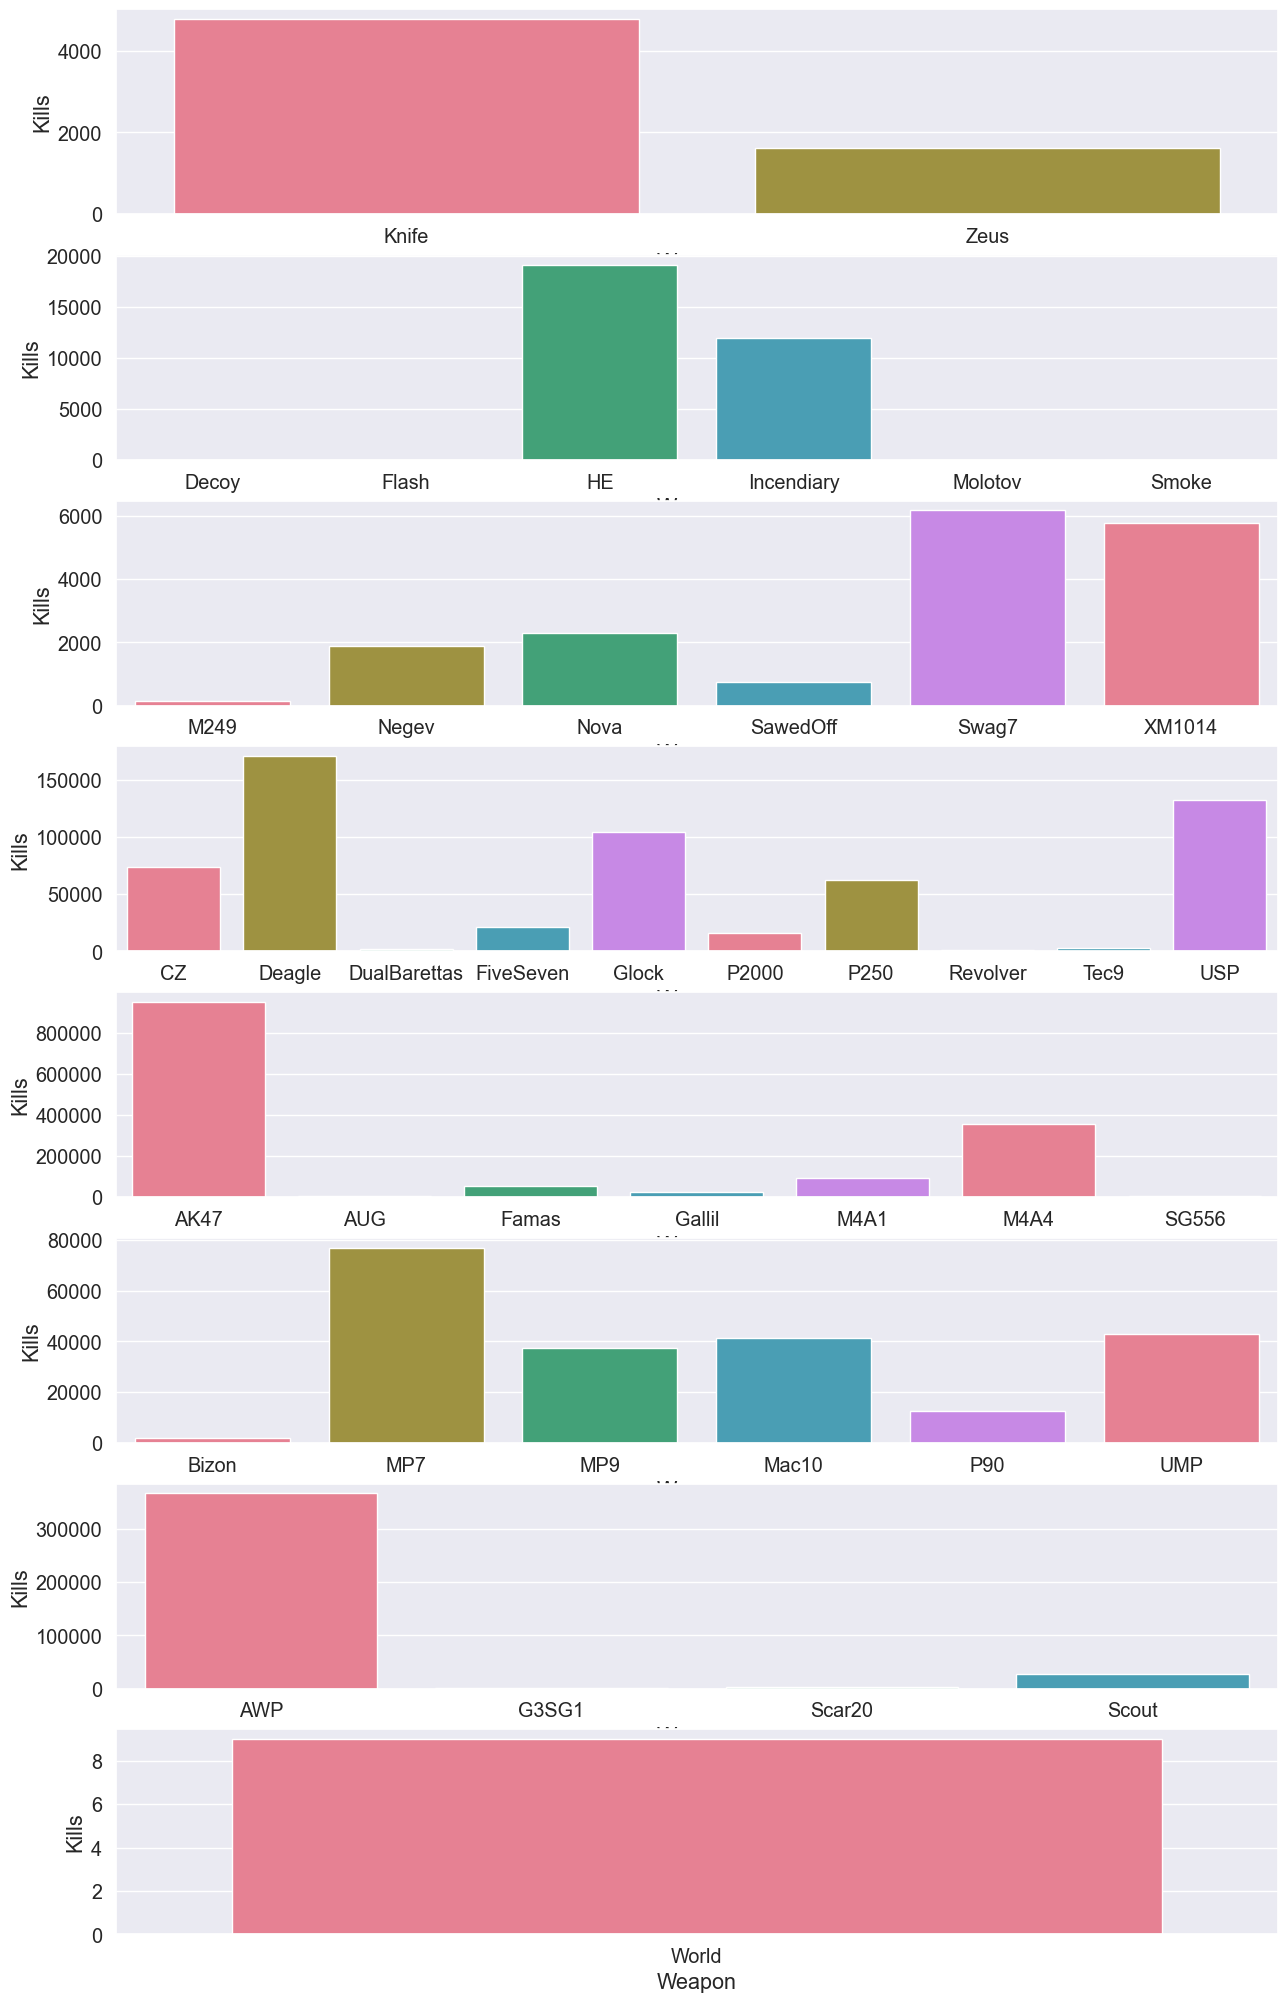

In [67]:
# extract the data related to the weapons used on each kill
weaponData = killsData.groupby(['wp_type','wp']).count().reset_index()[['wp_type','wp','file']]
weaponData = weaponData.rename(columns = {'wp_type':'Weapon Type', 'wp':'Weapon', 'file':'Kills'})

# create a subplot for each weapon type
fig, axs = plt.subplots(ncols=1, nrows=8, figsize = (15,25)) # create 8 subplots
for ax_num in range(len(axs)): # loop through the subplots and plot the relavent data
    weaponType = weaponData['Weapon Type'].unique()[ax_num]
    dataToPlot = weaponData[weaponData['Weapon Type']==weaponType]
    sns.barplot(x='Weapon', y='Kills', data=dataToPlot, ax = axs[ax_num], palette=palette)

The data above shows the weapons used to kill other players. The sniper and rifle weapon types are dominated by the AWP and AK47 repsectively (as was expected based on experience).

I believe some of the data is erroneous. For example, 12000 players were killed using incendiaries versus 5 with molotovs (the T equivalent). Further inspection shows that many of these incendiary kills were done by Ts, many on other Ts, which is unlikely. It seems also that the number of players killed by the bomb is relatively low (given I would think it should be death by "world"). I believe that players killed by the bomb where logged as being killed by an incendiary, and by the bomb planter (explaining the high number of team-kills).

1 person was killed with a decoy, 7 with smoke grenades, and 10 with flashbangs. This isn't very relavent but is kind of funny, poor guys got bonked with tactical grenades.

Feel free to look at the source dataframe to see exactly how many kills each weapon got.

## Machine Learning to Predict Round Outcome

In this section I will attempt to use the Scikit-learn library to create a number of supervised machine learning models to predict the outcome of individual rounds. I have attempted to use a neural network (Scikit) as they excel at big data streams like this one. I am currently learning to use PyTorch and may come back to apply what I learn using a PyTorch NN.

The machine will take into account the following features:
- The T and CT economy (how much equipment they buy)
- The map
- Who won the previous round
- What round number it is
- How many players were alive at the end of last round
- Whether it is the first round
- Whether the bomb was planted last round

The different models that will be tested are:
- SVM
- K nearest neighbours
- Random forest classifier
- Multi-Layered Perceptron

Feel free to take this code and edit the classifier parameters as you please to try and get a better score!

In [20]:
# extracting all the raw columns that don't need additional processing
dataProcessing1 = metaData[['round','ct_eq_val','t_eq_val']]

# converting the map data into a binary input for each map so it can be processed by the machine
maps = metaData['map'].unique() # order: overpass, cache, inferno, muirage, train, dust2, cobble, nuke
mapsBin = pd.DataFrame()
for mapp in maps:
    mapsBin[mapp] = metaData['map'].apply(lambda x: 1 if x == mapp else 0)
    
# creating the binary column with who won the previous round
# first create a series with a single value (to shift the series down)
s = pd.Series([0])
# creating a series with 1 if the it is not the first round and 0 if it is
isNotFirstRound = metaData['round'].apply(lambda x: 0 if x == 1 else 1).rename('isNotFirstRound').reset_index(drop=True)
# append the series from above, shifting the series down (now when the series are put together match up with the previous
#   match)
shiftedWinnerSide = s.append(metaData['winner_side'])
# create the two series with the binary output whether Ts or CTs won (cutting off the last row as it not meaningful)
tWinPrev = shiftedWinnerSide.apply(lambda x: 1 if x=='Terrorist' else 0).iloc[:-1]
ctWinPrev = shiftedWinnerSide.apply(lambda x: 1 if x=='CounterTerrorist' else 0).iloc[:-1]
# resetting the index for the next part
tWinPrev = tWinPrev.reset_index(drop=True)
ctWinPrev = ctWinPrev.reset_index(drop=True)
# multiply each series by the "isNotFirstRound" from above. This ensures that on pistol round nobody has won previously,
#    without this first rounds would have a previous winner and the machine may attempt to find a pattern in that
tWinPrev = (tWinPrev * isNotFirstRound).rename('tWinPrev')
ctWinPrev = (ctWinPrev * isNotFirstRound).rename('tWinPrev')
# combine the two series into a single dataframe
prevWinDF = pd.concat([tWinPrev,ctWinPrev], axis = 1)

# convert the round winner to a binary number. This is the data the machine will attempt to predict
dataToPredict = metaData['winner_side'].apply(lambda x: 1 if x=='Terrorist' else 0)

In [21]:
# creating a list of the different data categories we will use, you can add and remove these as you please
processedCols = [dataProcessing1, mapsBin, tWinPrev, ctWinPrev, dataToPredict]
# concatenate them into a single dataframe
processedData = pd.concat(processedCols, axis = 'columns', join = 'inner')
# take a peek at the feature list
print('Feature list:')
processedData.columns

Feature list:


Index(['round', 'ct_eq_val', 't_eq_val', 'de_overpass', 'de_cache',
       'de_inferno', 'de_mirage', 'de_train', 'de_dust2', 'de_cbble',
       'de_nuke', 'tWinPrev', 'tWinPrev', 'winner_side'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [23]:
# separtate the data into X and y sets. The datasets are shortened to cut down on processing time! Feel free to crank the set size up or down depending
# on your resources. You can change this and then run an individual classifier.
subset_size = 5000
X = processedData.drop('winner_side', axis = 1)[:subset_size]
y = processedData['winner_side'][:subset_size]
# split them into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# scale the data
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### K-Nearest Neighbours Classifier

In [24]:
# instantiate lists to hold the values
Ks = []
Kscores = []
# loop through different K values, testing each one, to find the optimal one
for K in range(15,100):
    kClassifier = KNeighborsClassifier(n_neighbors=K)
    kClassifier.fit(X_train, y_train)
    y_pred = kClassifier.predict(X_test)
    Kscores.append(f1_score(y_test, y_pred))
    Ks.append(K)

# extract and print the best K value
bestK = Ks[Kscores.index(max(Kscores))]
print(f'Optimal K-value: {bestK}')

kClassifier = KNeighborsClassifier(n_neighbors=bestK)
kClassifier.fit(X_train, y_train)
y_pred = kClassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Optimal K-value: 67
[[413 224]
 [179 434]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       637
           1       0.66      0.71      0.68       613

    accuracy                           0.68      1250
   macro avg       0.68      0.68      0.68      1250
weighted avg       0.68      0.68      0.68      1250



### SVM Classifier

In [25]:
from sklearn.svm import SVC

# instantiate hyper variable and scores lists
gammas = []
Cs = []
svmScores = []

# loop through the data, changing gamma and C to find an optimal value. This takes a while depending on the number of cases you test so be careful.
for C in np.linspace(0, 10, 20):
    for gamma in np.linspace(0.01, 1, 20):
        SVM = SVC(C = C, gamma = gamma)
        SVM.fit(X_train, y_train)
        score = SVM.score(X_test, y_test)
        svmScores.append(score)
        gammas.append(gamma)
        Cs.append(C)
        
# extract the best C and gamma values
index = svmScores.index(max(svmScores))
bestC = Cs[index]
bestGamma = gammas[index]

print(f'Best C value: {bestC}')
print(f'Best gamma value: {bestGamma}')

SVM = SVC(C=bestC, gamma=bestGamma)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: C <= 0

### Random Forest Classifier

In [26]:
depths = []
RFCscores = []
for depth in range(2, 16):
    forest = RandomForestClassifier(n_estimators=200, max_depth=depth, random_state=42)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    depths.append(depth)
    RFCscores.append(f1_score(y_test, y_pred))
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    
bestDepth = depths[RFCscores.index(max(RFCscores))]
print(f'Best depth setting: {bestDepth}')

forest = RandomForestClassifier(n_estimators=500, max_depth=bestDepth, random_state=42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best depth setting: 6
[[431 206]
 [206 407]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       637
           1       0.66      0.66      0.66       613

    accuracy                           0.67      1250
   macro avg       0.67      0.67      0.67      1250
weighted avg       0.67      0.67      0.67      1250



### Multi-Layered Perceptron Classifier

In [27]:
# feel free to mess around with all the values here to try and get better scores, it's pretty barebones right now.
MLPC = MLPClassifier(hidden_layer_sizes=(11,11), activation='relu',
                     batch_size=500, max_iter=200, random_state=42)
MLPC.fit(X_train, y_train)
y_pred = MLPC.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[428 209]
 [216 397]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       637
           1       0.66      0.65      0.65       613

    accuracy                           0.66      1250
   macro avg       0.66      0.66      0.66      1250
weighted avg       0.66      0.66      0.66      1250



### Conclusion

So as I'm sure you can see, the classifiers are all only slightly better than random at predicting the outcome. I was unable to bring the classifiers' accuracies above 70% (the best I did was 69% at some pouint). So that's pretty poor honestly. It could be that I'm using the machine learning badly (of course a possibility). Even more likely than that is I simply am not analysing the most important features that truly impact the result. This is somewhat expected, the most important determinant in whether a team wins or loses a match is ultimately down primarily to the players' skills, which are not at all implemented here. 

To make a more accurate model I suggest finding information about the teams (or even individual players) to add as features here. It would also be useful to include how many of each kind of weapon each team has etc. I don't know if this data even exists, but it's a thought.

Cheers if you actually went through this whole thing.


### Quick Side Notes

So basically I planned to add the data for the number of people alive in the previous round and the data for whether the bomb was planted. These are in a different file do not contain the same number of games and so would require a good bit more processing to work out and implement. After doing all the above classifiers and finding the scores to be only around 68%, I figured it would be a lot of work and is unlikely to change the results. If you guys are interested I have included some code below to create columns for those two features, but the files need to be matched up.

In [28]:
# creates a table indicating whether the bomb was planted for each round. 
# requires somebody to die after the bomb was planted to work and so is not entirely accurate !
killsData['binBombPlant'] = killsData['is_bomb_planted'].map({False:0, True:1})
bombPlantData = killsData[['file','round','binBombPlant']].groupby(['file','round']).max().reset_index()
bombPlantData.head()

,file,round,binBombPlant
0,esea_match_13770997.dem,1,1
1,esea_match_13770997.dem,2,0
2,esea_match_13770997.dem,3,0
3,esea_match_13770997.dem,4,1
4,esea_match_13770997.dem,5,0


In [29]:
# gives how many of each team remained alive after each round
killsData.groupby(['file','round'])[['ct_alive', 't_alive']].min()

ct_alive  t_alive
file                    round                   
esea_match_13770997.dem 1             0        1
                        2             1        2
                        3             0        4
                        4             0        1
                        5             3        0
...                                 ...      ...
esea_match_13829173.dem 18            0        3
                        19            0        3
                        20            0        3
                        21            0        2
                        22            0        2

[383890 rows x 2 columns]